In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import davies_bouldin_score

C:\Users\ravjo\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
transactions_df = pd.read_csv('Transactions.csv')
products_df = pd.read_csv('Products.csv')
customers_df = pd.read_csv('Customers.csv')

In [3]:
customer_transactions = transactions_df.groupby('CustomerID').agg({
    'TransactionID': 'count',  # Number of transactions
    'Quantity': 'sum',        # Total quantity purchased
    'TotalValue': 'sum'       # Total value of transactions
}).rename(columns={
    'TransactionID': 'NumTransactions',
    'Quantity': 'TotalQuantity',
    'TotalValue': 'TotalSpent'
}).reset_index()


In [4]:
# Merge with customer profile data
customer_data = pd.merge(customers_df, customer_transactions, on='CustomerID', how='inner')
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate,NumTransactions,TotalQuantity,TotalSpent
0,C0001,Lawrence Carroll,South America,2022-07-10,5,12,3354.52
1,C0002,Elizabeth Lutz,Asia,2022-02-13,4,10,1862.74
2,C0003,Michael Rivera,South America,2024-03-07,4,14,2725.38
3,C0004,Kathleen Rodriguez,South America,2022-10-09,8,23,5354.88
4,C0005,Laura Weber,Asia,2022-08-15,3,7,2034.24


In [5]:
# Feature selection and scaling
features = customer_data[['NumTransactions', 'TotalQuantity', 'TotalSpent']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [6]:
# Clustering
# Test different numbers of clusters and calculate Davies-Bouldin Index
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, labels)
    db_scores.append((k, db_index))

C:\Users\ravjo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ravjo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ravjo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ravjo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [7]:
# Select the best number of clusters (lowest DB Index)
best_k, best_db_index = min(db_scores, key=lambda x: x[1])

In [8]:
# Fit final model
kmeans = KMeans(n_clusters=best_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\ravjo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ravjo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\ravjo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


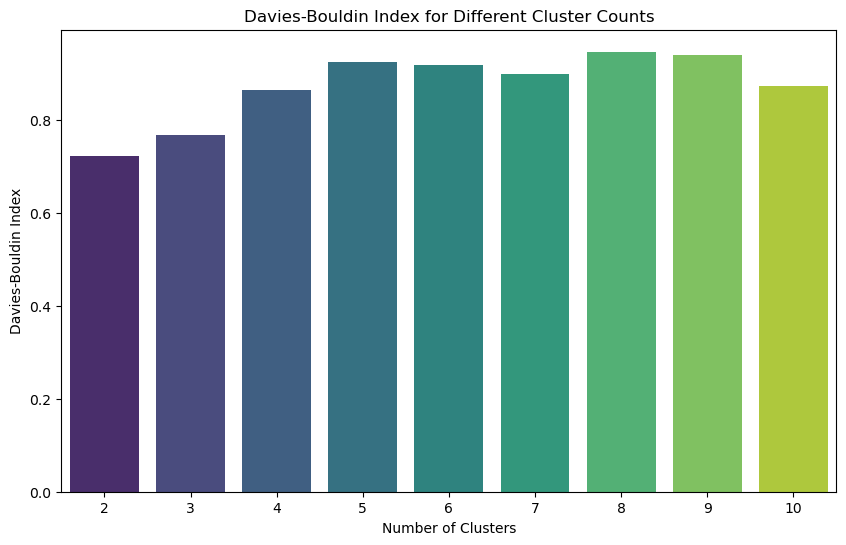

In [9]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[0] for x in db_scores], y=[x[1] for x in db_scores], palette='viridis')
plt.title('Davies-Bouldin Index for Different Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

<Axes: >

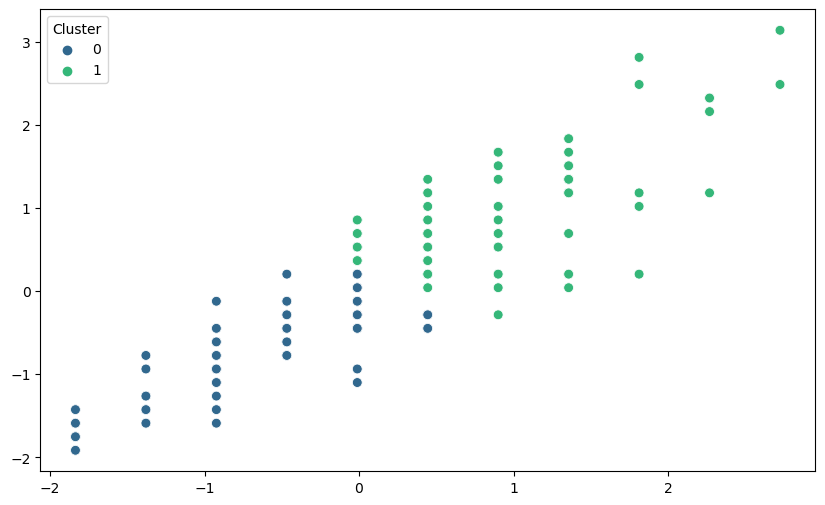

In [10]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0], 
    y=scaled_features[:, 1], 
    hue=customer_data['Cluster'], 
    palette='viridis', 
    s=50
)

In [11]:
print(f"Best Number of Clusters: {best_k}")
print(f"Best Davies-Bouldin Index: {best_db_index:.4f}")

Best Number of Clusters: 2
Best Davies-Bouldin Index: 0.7234
